In [1]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import
clarks = pd.read_excel('full.xlsx', sheet_name='Clarks')
narrow_neck = pd.read_excel('full.xlsx', sheet_name='Narrow Neck')
judges_bay = pd.read_excel('full.xlsx', sheet_name='Judges Bay')
weymouth = pd.read_excel('full.xlsx', sheet_name='Weymouth')
milford = pd.read_excel('full.xlsx', sheet_name='Milford')
full = pd.concat([clarks, narrow_neck, judges_bay, weymouth, milford], axis=0)

In [3]:
# Explore Clarks Beach for a start
clarks

,DATE,Entero,Rain(24),Rain(48),Rain(72),Rain(WA),Wdirection,Wspeed,SolarHours
0,1995-12-16,10,9.17,13.67,37.00,59.84,200.0,1.5,1.8
1,1995-12-27,10,0.00,0.00,0.33,0.33,230.0,5.7,8.5
2,1995-12-28,10,2.50,2.50,2.50,7.50,320.0,3.6,11.7
3,1996-01-07,10,0.00,0.00,0.00,0.00,130.0,4.1,7.9
4,1996-01-08,10,0.00,0.00,0.00,0.00,100.0,3.6,4.4
...,...,...,...,...,...,...,...,...,...
240,2014-01-07,2200,0.00,0.51,2.57,3.08,51.0,3.3,12.5
241,2016-03-23,2300,0.00,0.00,0.00,0.00,57.0,8.8,0.1
242,2018-02-13,3255,26.00,29.50,48.50,104.00,32.0,4.3,0.1
243,2018-01-18,4884,21.50,21.50,21.50,64.50,35.0,8.6,0.0


In [4]:
# Index Entero levels
clarks["Entero_Level"] = np.where(clarks["Entero"]>=280, 1, 0)
clarks = clarks.drop("Entero", axis=1)

In [5]:
# Stats
clarks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          245 non-null    datetime64[ns]
 1   Rain(24)      245 non-null    float64       
 2   Rain(48)      245 non-null    float64       
 3   Rain(72)      245 non-null    float64       
 4   Rain(WA)      245 non-null    float64       
 5   Wdirection    244 non-null    float64       
 6   Wspeed        245 non-null    float64       
 7   SolarHours    245 non-null    float64       
 8   Entero_Level  245 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 17.4 KB


In [6]:
clarks.describe()

,Rain(24),Rain(48),Rain(72),Rain(WA),Wdirection,Wspeed,SolarHours,Entero_Level
count,245.000000,245.000000,245.000000,245.000000,244.000000,245.000000,245.000000,245.000000
mean,2.564939,5.173265,8.392531,16.130735,171.262295,3.770204,6.860408,0.053061
std,6.553315,10.040883,13.571365,28.297706,96.088291,2.342963,3.810203,0.224614
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,81.000000,1.900000,3.500000,0.000000
50%,0.000000,1.000000,2.640000,4.830000,177.000000,3.200000,7.400000,0.000000
75%,1.610000,5.320000,10.840000,19.330000,246.250000,5.300000,10.100000,0.000000
max,57.900000,72.670000,82.250000,207.790000,360.000000,12.100000,14.100000,1.000000


In [7]:
clarks.groupby([clarks["DATE"].dt.year, clarks["DATE"].dt.month])["Entero_Level"].count()

DATE  DATE
1995  12       3
1996  1        8
      2        7
      3        7
      12       4
              ..
2018  1        2
      2        2
      3        1
      4        1
      5       10
Name: Entero_Level, Length: 66, dtype: int64

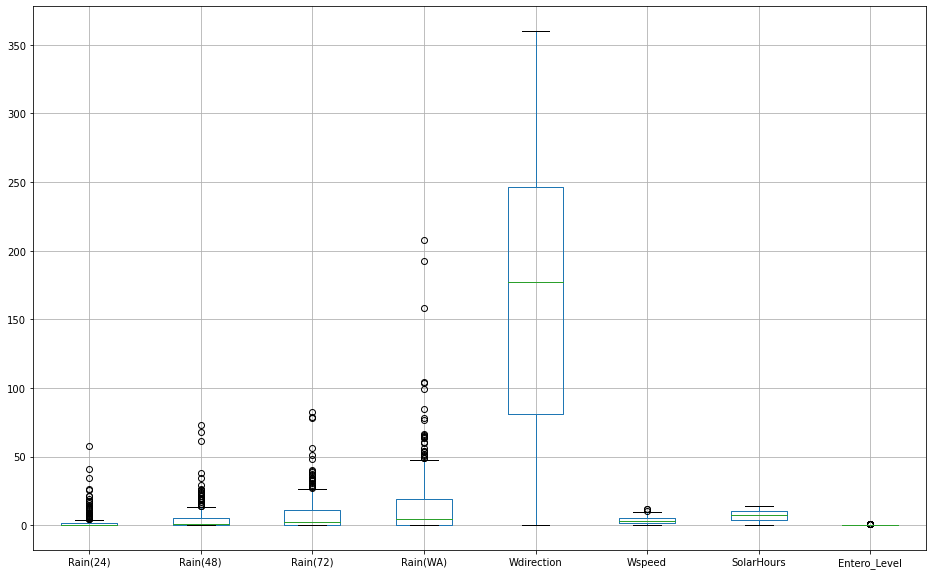

In [8]:
# Boxplot
figure = plt.figure()
clarks.boxplot()
figure.set_size_inches(16, 10)
figure.savefig("boxplot", format="png")

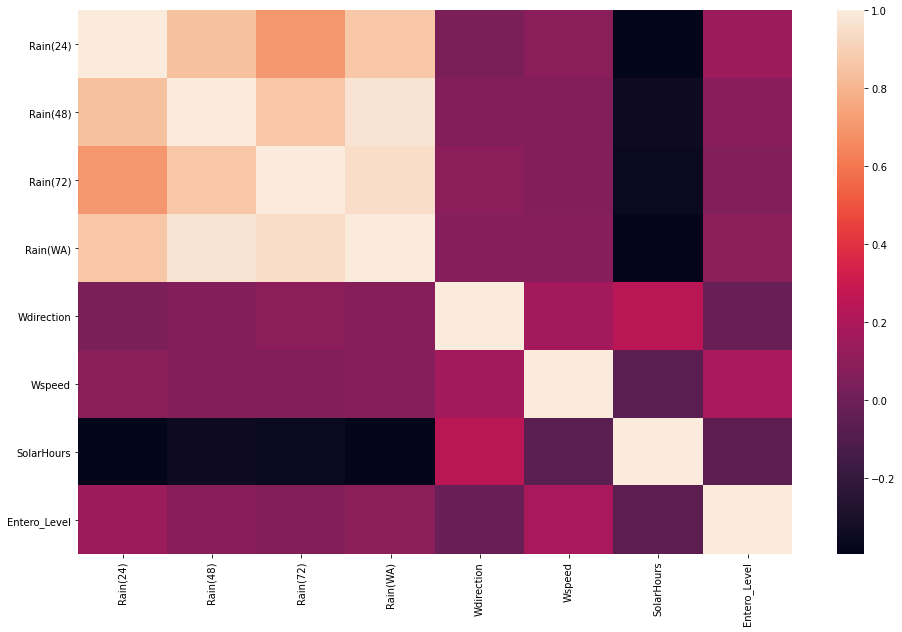

In [9]:
# Correlation Heatmap
heatmap = sns.heatmap(clarks.corr())
figure = heatmap.get_figure()
figure.set_size_inches(16, 10)
figure.savefig("correlation_heatmap", format="png")

In [10]:
# Lab
# rain24 = data_frame['Rain24']
# rain48 = data_frame['Rain48']
# rain72 = data_frame['Rain72']
# rainWA = data_frame['RainWA']
# windDirection = data_frame['Wdirection']
# windSpeed = data_frame['Wspeed']
# solarHours = data_frame['SolarHours']

# # Classification label
# water_label = np.array(data_frame['Class'],dtype=int)
# index_above = np.where(water_label == 1)
# index_below = np.where(water_label == 0)
# water_above_label = water_label[index_above]

# # Data normalization
# rain24_std = (rain24 - np.min(rain24))/(np.max(rain24) - np.min(rain24))
# rain48_std = (rain48 - np.min(rain48))/(np.max(rain48) - np.min(rain48))
# rain72_std = (rain72 - np.min(rain72))/(np.max(rain72) - np.min(rain72))
# rainWA_std = (rainWA - np.min(rainWA))/(np.max(rainWA) - np.min(rainWA))
# windSpeed_std = (windSpeed - np.min(windSpeed))/(np.max(windSpeed) - np.min(windSpeed))
# windDirection_std = windDirection / 360
# solarHours_std = solarHours / 24

# # Combine the data
# # factor_data = np.array([rain24_std, rain48_std,rain72_std,rainWA_std,windSpeed_std,windDirection_std,solarHours_std],dtype=float)
# factor_data = np.array([rain24_std, rain48_std,rain72_std,rainWA_std,solarHours_std],dtype=float)
# input_data = factor_data.T

# # Split the data randomly
# indices = np.random.permutation(len(rain24_std))
# n_training_samples = round(len(rain24_std)*0.7)
# trainset_data = input_data[indices[-n_training_samples:]]
# trainset_labels = water_label[indices[-n_training_samples:]]
# testset_data = input_data[indices[:-n_training_samples]]
# testset_labels = water_label[indices[:-n_training_samples]]

# # Run KNN with sklearn
# knn = KNeighborsClassifier()
# knn.fit(trainset_data, trainset_labels)
# KNeighborsClassifier(algorithm='auto',
#                      leaf_size=30,
#                      metric='minkowski',
#                      metric_params=None,
#                      n_jobs=1,
#                      n_neighbors=5,
#                      p=2,
#                      weights='uniform')

# # Show the KNN result
# print("Predictions form the knn classifier:")
# print(knn.predict(testset_data))
# print("Target values:")
# print(testset_labels)
# print("Overall accuracy:")
# print(accuracy_score(testset_labels,knn.predict(testset_data)))


# # Step 5/6: ML with balanced data set
# # Read the data from clark_adasyn
# data_fake_frame=pd.read_excel('clark_adasyn.xlsx')
# rain24_fake = data_fake_frame['Rain24']
# rain48_fake = data_fake_frame['Rain48']
# rain72_fake = data_fake_frame['Rain72']
# rainWA_fake = data_fake_frame['RainWA']
# windDirection_fake = data_fake_frame['Wdirection']
# windSpeed_fake = data_fake_frame['Wspeed']
# solarHours_fake = data_fake_frame['SolarHours']
# water_fake_label = np.array(data_fake_frame['Class'],dtype=int)

# # Data normalization
# rain24_fake_std = (rain24_fake - np.min(rain24_fake))/(np.max(rain24_fake) - np.min(rain24_fake))
# rain48_fake_std = (rain48_fake - np.min(rain48_fake))/(np.max(rain48_fake) - np.min(rain48_fake))
# rain72_fake_std = (rain72_fake - np.min(rain72_fake))/(np.max(rain72_fake) - np.min(rain72_fake))
# rainWA_fake_std = (rainWA_fake - np.min(rainWA_fake))/(np.max(rainWA_fake) - np.min(rainWA_fake))
# windSpeed_fake_std = (windSpeed_fake - np.min(windSpeed_fake))/(np.max(windSpeed_fake) - np.min(windSpeed_fake))
# windDirection_fake_std = windDirection_fake / 360
# solarHours_fake_std = solarHours_fake / 24

# # Combine the data
# # factor_fake_data = np.array([rain24_fake_std, rain48_fake_std,rain72_fake_std,rainWA_fake_std,windSpeed_fake_std,windDirection_fake_std,solarHours_fake_std],dtype=float)
# factor_fake_data = np.array([rain24_fake_std, rain48_fake_std,rain72_fake_std,rainWA_fake_std,solarHours_fake_std],dtype=float)
# input_fake_data = factor_fake_data.T

# # For loop
# j=np.zeros(10)
# for i in range(10):
#     # Generate the training and testing data
#     input_real_above_data = input_data[index_above]
#     input_real_below_data = input_data[index_below]
#     indices = np.random.permutation(232)
#     n_training_samples = round(218)
#     trainset_below_data = input_real_below_data[indices[-n_training_samples:]]
#     trainset_below_labels = water_label[indices[-n_training_samples:]]
#     testset_below_data = input_real_below_data[indices[:-n_training_samples]]
#     testset_below_labels = water_label[indices[:-n_training_samples]]
#     trainset_data = np.vstack((input_fake_data, trainset_below_data))
#     trainset_labels = np.hstack((water_fake_label, trainset_below_labels))
#     testset_data = np.vstack((input_real_above_data, testset_below_data))
#     testset_labels = np.hstack((water_above_label, testset_below_labels))

#     # Run KNN with sklearn
#     knn = KNeighborsClassifier()
#     KNeighborsClassifier(algorithm='auto',
#                          leaf_size=30,
#                          metric='minkowski',
#                          metric_params=None,
#                          n_jobs=1,
#                          n_neighbors=5,
#                          p=2,
#                          weights='uniform')
#     knn.fit(trainset_data, trainset_labels)
#     j[i]=accuracy_score(testset_labels,knn.predict(testset_data))
#     i=i+1
# #End of loop

# # Show the KNN result
# print("Predictions form the knn classifier:")
# print(knn.predict(testset_data))
# print("Target values:")
# print(testset_labels)
# print("Overall accuracy:")
# print(accuracy_score(testset_labels,knn.predict(testset_data)))
# plt.boxplot(j)
# plt.show()